In [54]:
using OrdinaryDiffEq, LaTeXStrings, Plots;

In [55]:
tspan = (0.0, 20.0);
A = 0.1;
ω = π/2 # pi/2 rad/s
p = 1
g = 9.81
Ω = sqrt(g/(ω^2*p)-1);

In [56]:
function prob1!(dv, v, p, t)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = (-u*du^2 - Ω^2*u)/(1+u^2)
end

prob1! (generic function with 1 method)

In [57]:
u0 = [A, 0]
prob = ODEProblem(prob1!, u0, tspan)
sol = solve(prob, Tsit5(), reltol = 1e-8, abstol = 1e-8);

$x(t) \approx A \cos \left(\sqrt{\frac{g}{\omega^2 p}-1} \ t\right)$

In [58]:
# approx(t) = A*cos(Ω*t)
approx1(t) = A*cos(sqrt((g/(ω^2*p)-1)-(A^2*g)/(2*ω^2*p))*t)
# approx2(t) = A*(cos(Ω*t))-A^3*(g/(2*ω^2*p))*t*sin(t)
tvals = LinRange(tspan[1], tspan[2], 500);

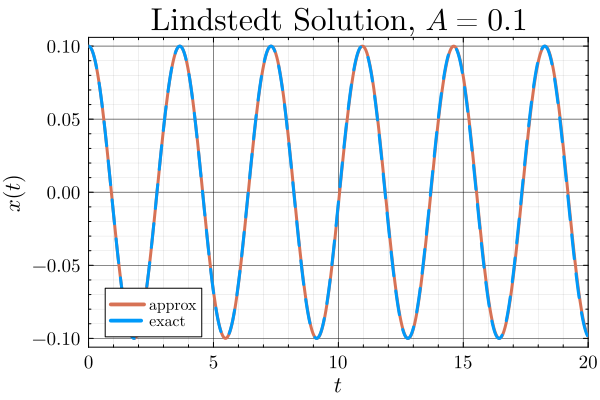

In [59]:
theme(:dao::Symbol)

plot(tvals, [approx1.(tvals)],
    labels="approx",
    line=(3, :solid),
    )
plot!(sol, 
    idxs=[1],
    line=(3, :dash),
    label="exact",
    title=L"Lindstedt Solution, $A = $"*"$A",
    xlabel=L"$t$",
    ylabel=L"$x(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,)
# savefig("Aero_HW5_Prob1.pdf")

In [60]:
# Interpolate the solution on the t-values we defined previously as "tvals"
numerical_sol = [s[1] for s in sol.(tvals)];
difference = (numerical_sol .- approx1.(tvals));
# difference1 = (numerical_sol .- approx1.(tvals));
# difference2 = (numerical_sol .- approx2.(tvals));

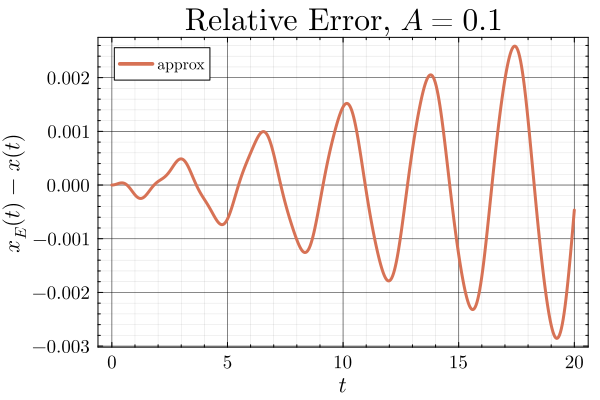

In [61]:
plot(tvals, [difference], 
label="approx",
    line=(3, :solid),
    title=L"Relative Error, $A = $"*"$A",
    xlabel=L"$t$",
    ylabel=L"$x_{E}(t) - x(t)$",
    legend=:best,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    )
#savefig("Aero_HW5_Prob1_error.pdf")